In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic.shape

(891, 12)

In [95]:
column=['PassengerId','Name','Ticket','Fare','Cabin']

In [96]:
newdf=titanic.drop(column,axis=1)

In [97]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [98]:
newdf['Sex']=newdf['Sex'].astype('category')
newdf['Sex']=newdf['Sex'].cat.codes

In [41]:
newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,S
887,1,1,0,19.0,0,0,S
888,0,3,0,NaN,1,2,S
889,1,1,1,26.0,0,0,C


In [99]:
newdf['Embarked']=newdf['Embarked'].astype('category')
newdf['Embarked']=newdf['Embarked'].cat.codes

In [46]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [100]:
newdf.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

<AxesSubplot:xlabel='Age'>

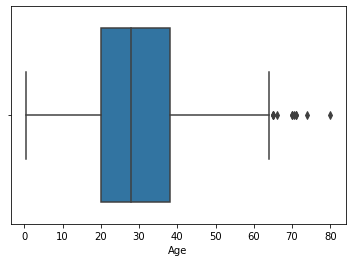

In [101]:
sns.boxplot(newdf['Age'])

In [102]:
newdf['Age']=newdf['Age'].fillna(newdf['Age'].median())

In [103]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [104]:
newdf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

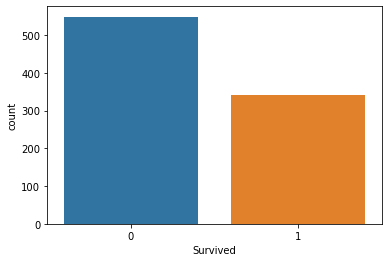

In [105]:
sns.countplot(newdf['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

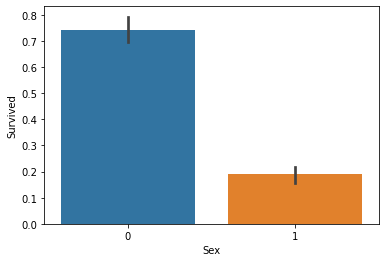

In [106]:
sns.barplot(data=newdf,x="Sex",y="Survived")

In [107]:
survived_men=newdf[(newdf["Sex"]==1)&(newdf["Survived"]==1)]["Sex"].count()

In [108]:
survived_men

109

In [109]:
survived_women=newdf[(newdf["Sex"]==0)&(newdf["Survived"]==1)]["Sex"].count()

In [110]:
survived_women

233

In [111]:
newdf['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [112]:
male=newdf['Sex'][newdf['Sex']==1].sum()
print(male)

577


In [118]:
female=newdf[newdf['Sex']==0]['Sex'].count()
print(female)

314


In [88]:
male_percentage_survived=survived_men*100/male
print("Percentage of male Survived :",male_percentage_survived,"%")

Percentage of male Survived : 18.890814558058924 %


In [119]:
female_percentage_survived=survived_women*100/female
print("Percentage of female Survived :",female_percentage_survived,"%")

Percentage of female Survived : 74.20382165605096 %


In [121]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


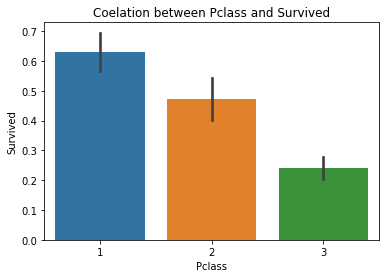

In [127]:
sns.barplot(newdf['Pclass'],newdf['Survived'])
plt.title("Coelation between Pclass and Survived")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

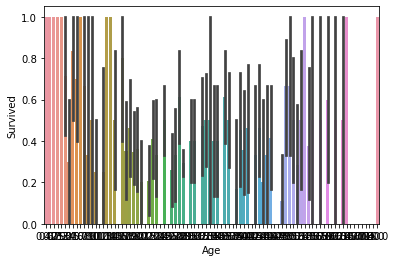

In [128]:
sns.barplot(newdf['Age'],newdf['Survived'])

In [129]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [132]:
y=newdf['Survived']
x=newdf.iloc[:,2:]

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [139]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [140]:
y_pred=model.predict(x_test)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7757847533632287

In [143]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [145]:
y_pred1=dtree.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7309417040358744

In [150]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [151]:
y_pred2=rfc.predict(x_test)

In [152]:
accuracy_score(y_test,y_pred2)

0.726457399103139

In [153]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 7.6 kB/s  eta 0:00:01MB 35.8 MB/s eta 0:00:05


In [160]:
import xgboost as xgb
xgboost=xgb.XGBClassifier(learning_rate=0.1, random_state=0)
xgboost.fit(x_test,y_test)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:37:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=16, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [163]:
y_pred_xgb1 = xgboost.predict(x_test)

In [162]:
accuracy_score(y_test,y_pred_xgb1)

0.8699551569506726

In [164]:
y_pred_xgb1

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

In [165]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
506    1
467    0
740    1
354    0
449    1
Name: Survived, Length: 223, dtype: int64

In [167]:
PassengerId=titanic["PassengerId"]

In [168]:
PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [170]:
my_submission=pd.DataFrame({"Survived":y_pred_xgb1})

In [171]:
my_submission.to_csv("my_submission.csv",index=False)